In [37]:
# import the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import re
import sys
import datetime
# import pandoc
 


# for visusal
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import matplotlib.colors as mcolors


%matplotlib inline

In [38]:
# load and read data file
'''inside the quotation is the a filepath of the data file'''
Unicorn_data = pd.read_csv(r'C:\Users\BAB AL SAFA\Documents\Unicorn_Companies.csv') # for csv file # pd.read_excel(r'')===> for excel filr format
Unicorn_data

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,6/29/2017,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,4/18/2017,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,5/6/2021,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,10/19/2021,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


## Data Inspection and Manipulation 

In [39]:
# view the shape of data
Unicorn_data.shape

(1074, 10)

In [41]:
# view the info of data
Unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [42]:
# view columns
Unicorn_data.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [44]:
Unicorn_data.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [45]:
# check for missing values
Unicorn_data.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [46]:
Unicorn_data.rename(columns={'Date Joined': 'Date', 'Valuation': 'Valuation ($B)', 'Select Investors': 'Investors', 'Funding': 'Funding ($B)'}, inplace=True)

Unicorn_data['Investors'] = Unicorn_data['Investors'].astype(str)

Unicorn_data['Date'] = pd.to_datetime(Unicorn_data['Date'])

Unicorn_data['Valuation ($B)'] = Unicorn_data['Valuation ($B)'].astype(str).str.replace(',', '').str.replace('$', '').str.replace('B', '').astype('float64')

# Convert the 'Funding' column to string data type
Unicorn_data['Funding ($B)'] = Unicorn_data['Funding ($B)'].astype(str)

# Remove symbols from the 'Funding' column
Unicorn_data['Funding ($B)'] = Unicorn_data['Funding ($B)'].str.replace(',', '').str.replace('$', '').str.replace('B', '').str.replace('M', '')

# Replace 'Unknown' values with NaN
Unicorn_data['Funding ($B)'] = Unicorn_data['Funding ($B)'].replace('Unknown', np.nan)

# Convert the 'Funding' column to a float data type
Unicorn_data['Funding ($B)'] = Unicorn_data['Funding ($B)'].astype(float)

# Convert values greater than or equal to 1000 from millions to billions
#Unicorn_data.loc[Unicorn_data['Funding ($B)'] >= 1000, 'Funding ($B)'] //= 1000

Unicorn_data['Funding ($B)'] = Unicorn_data['Funding ($B)'].astype(str)


Unicorn_data['Funding ($B)'] = np.where(Unicorn_data['Funding ($B)'].str.contains('M'), Unicorn_data['Funding ($B)'].str.replace('M', '').astype(float) // 1000, Unicorn_data['Funding ($B)'].str.replace('B', '').astype(float))


# Replace NaN values with 0 and convert the 'Funding' column to an integer data type
Unicorn_data['Funding ($B)'] = Unicorn_data['Funding ($B)'].fillna(0).astype('int64')



C:\Users\BAB AL SAFA\AppData\Local\Temp\ipykernel_16680\1616263888.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Unicorn_data['Valuation ($B)'] = Unicorn_data['Valuation ($B)'].astype(str).str.replace(',', '').str.replace('$', '').str.replace('B', '').astype('float64')
C:\Users\BAB AL SAFA\AppData\Local\Temp\ipykernel_16680\1616263888.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Unicorn_data['Funding ($B)'] = Unicorn_data['Funding ($B)'].str.replace(',', '').str.replace('$', '').str.replace('B', '').str.replace('M', '')


In [47]:
print(Unicorn_data['Funding ($B)'].unique())

[  8   7   2   4 572   3  14   5 918 476 770 979 721 490 734 427 400   1
 799 765 800 376 558 294 564 333 691 343 497  71 679 775 105 742 607 549
 660 820 297 922 863 447 844 603 583 912 920 849 424 645 802 629 448 928
 815 728 433 891 524 803 415 587 826 910 412 405 729 600 869 187 943 514
 492 644 562 286 559 647 567 428 996 596 426 462 824 926 755 633 599 371
 425 761 903 704 503 655 263 216 128 776 119 555 864 468 505 542 381 434
 643 948 435   0 489 352 477 125 404 498 493 657 440 792 739 324 379 367
 414 350 495 664 546 523 667 250 720 535 110 870 614 504 881 856 413 230
 553 445 335 450 154 471  54 418 859 714 225 408 500 532 531 582  75 685
 280 274 314 366 465 730 987 313 148 789 395 496 706 357 722 407 818 248
 507 543 200 417 999 880 777 398 666 461 682 483 299 326 812 591 334 399
 698 551 665 628 475 788 360 328 487 351 711 975 474 525 393 612 329 330
 170 240 419 311 339 919 180 127 224  45 946  19 536 188 101 390 717  29
 186 137 634 556 594 696 640 754 221 340 766 431 23

In [48]:
print(Unicorn_data['Funding ($B)'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
1069    False
1070    False
1071    False
1072    False
1073    False
Name: Funding ($B), Length: 1074, dtype: bool


In [49]:
Unicorn_data.dtypes

Company                   object
Valuation ($B)           float64
Date              datetime64[ns]
Industry                  object
City                      object
Country                   object
Continent                 object
Year Founded               int64
Funding ($B)               int64
Investors                 object
dtype: object

In [50]:
Unicorn_data.head()

,Company,Valuation ($B),Date,Industry,City,Country,Continent,Year Founded,Funding ($B),Investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita..."


In [51]:
Unicorn_data[Unicorn_data.City.isnull()]

,Company,Valuation ($B),Date,Industry,City,Country,Continent,Year Founded,Funding ($B),Investors
12,FTX,32.0,2021-07-20,Fintech,NaN,Bahamas,North America,2018,2,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,4.0,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,263,Kuang-Chi
242,Moglix,3.0,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,471,"Jungle Ventures, Accel, Venture Highway"
251,Trax,3.0,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,1,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,3.0,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,328,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,2.0,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,975,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,2.0,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,536,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,1.0,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,288,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,1.0,2021-06-01,Fintech,NaN,Singapore,Asia,2019,100,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,1.0,2021-07-01,Fintech,NaN,Singapore,Asia,2018,210,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [17]:
# check the first 5 rows
Unicorn_data.head(20)

,Company,Valuation ($B),Date,Industry,City,Country,Continent,Year Founded,Funding ($B),Investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,40.0,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,572,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,40.0,2019-05-02,Fintech,London,United Kingdom,Europe,2012,2,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,39.0,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,3,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,38.0,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,14,Tiger Global Management
9,Databricks,38.0,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,3,"Andreessen Horowitz, New Enterprise Associates..."


In [52]:
# check the last 5 rows
Unicorn_data.tail()

,Company,Valuation ($B),Date,Industry,City,Country,Continent,Year Founded,Funding ($B),Investors
1069,Zhaogang,1.0,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,379,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,1.0,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,990,"58.com, Tencent Holdings"
1071,Zihaiguo,1.0,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,80,"Xingwang Investment Management, China Capital ..."
1072,Zopa,1.0,2021-10-19,Fintech,London,United Kingdom,Europe,2005,792,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,1.0,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,620,"Novator Partners, True, Causeway Media Partners"


In [53]:
# How many unique valuation have no city
len(Unicorn_data[Unicorn_data.City.isnull()]['Valuation ($B)'].unique())

5

In [54]:
Unicorn_data.describe()

,Valuation ($B),Year Founded,Funding ($B)
count,1074.000000,1074.000000,1074.000000
mean,3.455307,2012.895717,334.313780
std,8.547022,5.698573,238.665354
min,1.000000,1919.000000,0.000000
25%,1.000000,2011.000000,161.000000
50%,2.000000,2014.000000,299.000000
75%,3.000000,2016.000000,488.500000
max,180.000000,2021.000000,999.000000


In [55]:
# What countries have valuation with no city?
Unicorn_data[Unicorn_data.City.isnull()].Country.value_counts()

Singapore    12
Hong Kong     3
Bahamas       1
Name: Country, dtype: int64

In [56]:
# Check the number of records that will be affected

print('Total number of records: ', Unicorn_data.shape[0])
print('Number of records with missing City: ', Unicorn_data[Unicorn_data.City.isnull()].shape[0])  
print('Number of records without missing City: ', Unicorn_data[Unicorn_data.City.notna()].shape[0]) 


Total number of records:  1074
Number of records with missing City:  16
Number of records without missing City:  1058


In [57]:
# Number of rows with City
num_missing = Unicorn_data[Unicorn_data.City.isnull()].shape[0]

# number of rows in all the dataset

num_all = Unicorn_data.shape[0]

# Percentage of rows with missing city 
round((num_missing / num_all) * 100, 2)

1.49

In [31]:
Unicorn_data.isnull()

,Company,Valuation ($B),Date,Industry,City,Country,Continent,Year Founded,Funding ($B),Investors
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1069,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False


In [58]:
Unicorn_data.City.value_counts()

San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
                ... 
Santa Barbara      1
Altrincham         1
Northbrook         1
Cincinnati         1
Milpitas           1
Name: City, Length: 256, dtype: int64

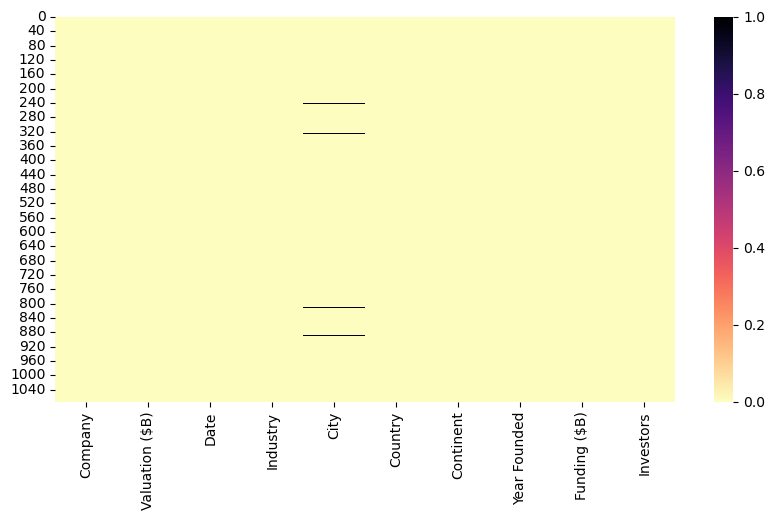

In [59]:
plt.figure(figsize = (10, 5))
sns.heatmap(Unicorn_data.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

## Unicorn Startups in Different Industry Sector in Indian

In [60]:
India = Unicorn_data[Unicorn_data['Country'] == "India"]
India

,Company,Valuation ($B),Date,Industry,City,Country,Continent,Year Founded,Funding ($B),Investors
15,BYJU's,22.0,2017-07-25,Edtech,Bengaluru,India,Asia,2008,4,"Tencent Holdings, Lightspeed India Partners, S..."
41,Swiggy,11.0,2018-06-21,"Supply chain, logistics, & delivery",Bengaluru,India,Asia,2014,5,"Accel India, SAIF Partners, Norwest Venture Pa..."
48,OYO Rooms,10.0,2018-09-25,Travel,Gurugram,India,Asia,2012,3,"SoftBank Group, Sequoia Capital India,Lightspe..."
71,Dream11,8.0,2019-04-09,Internet software & services,Mumbai,India,Asia,2007,2,"Kaalari Capital, Tencent Holdings, Steadview C..."
74,Razorpay,8.0,2020-10-11,Fintech,Bengaluru,India,Asia,2013,742,"Sequoia Capital India, Tiger Global Management..."
...,...,...,...,...,...,...,...,...,...,...
955,Licious,1.0,2021-10-05,E-commerce & direct-to-consumer,Bengaluru,India,Asia,2015,489,"3one4 Capital Partners, Bertelsmann India Inve..."
967,Mensa Brands,1.0,2021-11-16,Other,Bengaluru,India,Asia,2021,218,"Accel, Falcon Edge Capital, Norwest Venture Pa..."
981,NoBroker,1.0,2021-11-23,Internet software & services,Bengaluru,India,Asia,2014,424,"General Atlantic, Elevation Capital, BEENEXT"
1026,Slice,1.0,2021-11-28,Fintech,Bengaluru,India,Asia,2015,249,"Gunosy Capital, Blume Ventures, Das Capital"


In [61]:
company_wise_valuation = Unicorn_data.sort_values(by="Valuation ($B)", ascending=False)
company_wise_valuation.head(10)
company_wise_valuation

,Company,Valuation ($B),Date,Industry,City,Country,Continent,Year Founded,Funding ($B),Investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
754,Kuaikan Manhua,1.0,2017-12-01,Internet software & services,Beijing,China,Asia,2014,594,"Sequoia Capital China, CMC Capital Partners, T..."
753,Incode Technologies,1.0,2021-12-07,Cybersecurity,San Francisco,United States,North America,2015,257,"Dila Capital, Framework Ventures, 3L"
752,Honor Technology,1.0,2021-10-05,Internet software & services,San Francisco,United States,North America,2014,325,"Andreessen Horowitz, Prosus Ventures, Thrive C..."
751,Flipdish,1.0,2022-01-13,Internet software & services,Dublin,Ireland,Europe,2015,157,"Tencent Holdings, Tiger Global Management, Glo..."


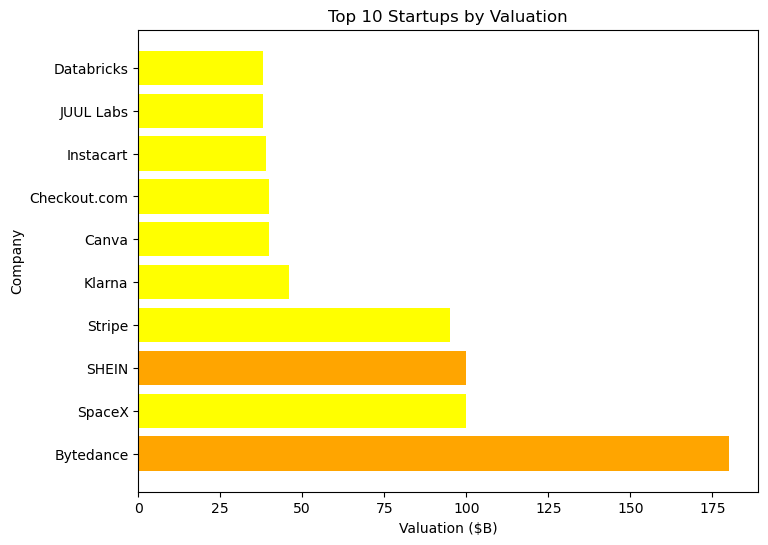

In [89]:
# Define a color mapping dictionary with a default color
color_map = {'USA': mcolors.CSS4_COLORS['blue'],
             'China': mcolors.CSS4_COLORS['orange'],
             'India': mcolors.CSS4_COLORS['greenyellow'],
             'UK': mcolors.CSS4_COLORS['hotpink'],
             'Germany': mcolors.CSS4_COLORS['gold'],
             'South Korea': mcolors.CSS4_COLORS['mediumslateblue'],
             'default': mcolors.CSS4_COLORS['yellow']}

# Sort the data frame by valuation in descending order
company_wise_valuation = company_wise_valuation.sort_values(by="Valuation ($B)", ascending=False)

# Select the top 10 startups by valuation
top_10 = company_wise_valuation.head(10)

# Convert the country names to RGBA values using the color mapping dictionary
colors = [color_map.get(c, color_map['default']) for c in top_10['Country']]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_10['Company'], top_10['Valuation ($B)'], color=colors)
ax.set_xlabel('Valuation ($B)')
ax.set_ylabel('Company')
ax.set_title('Top 10 Startups by Valuation')
plt.show()


## Observation
-According to the data in our dataset, Bytedance from China has the highest valuation among startups,

with a total valuation of $180B. The second most valued startup are SpaceX and SHEIN, with a 

valuation of $100B respectively. It's noteworthy that SpaceX joined the unicorn club in 2012 which is

the fastest company to rise in terms of valuation.

In [69]:
##Top 15 city with most Unicorn Startups

top15_city = Unicorn_data.City.value_counts().head(15)
top15_city

San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
Bengaluru         29
Shenzhen          19
Paris             19
Palo Alto         18
Berlin            17
Boston            16
Hangzhou          16
Chicago           16
Mountain View     16
Tel Aviv          11
Name: City, dtype: int64

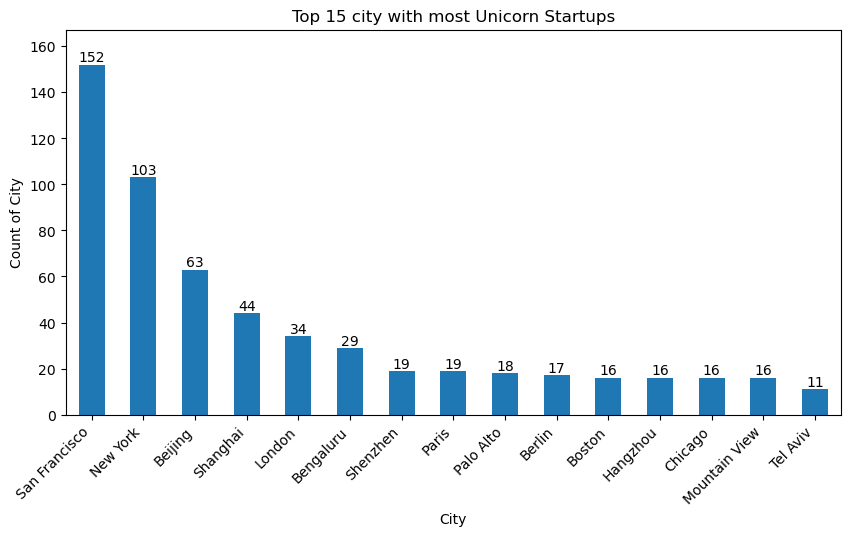

In [70]:
# visualize using bar chart
ax = top15_city.plot(kind = 'bar', figsize = (10, 5), title = 'Top 15 city with most Unicorn Startups', xlabel = 'City', 
                       ylabel = 'Count of City', legend = False)

# set x-axis tick labels and rotation
ax.set_xticklabels(top15_city.index, rotation=45, ha='right')

#annonate
ax.bar_label(ax.containers[0], label_type = 'edge')

# pad the spacing between the number and edge of the figure
ax.margins(y = 0.1)

# show the visual
plt.show()


Observation

it is observed that San Francisco has the highest number of Unicorn startups with a value of 152 while Tel Aviv has 11 comapared to other Cities

In [71]:
# Top 10 City by Valuation
top10_loc = Unicorn_data['Valuation ($B)'].groupby(Unicorn_data['City']).sum().head(10)
top10_loc

City
Aarhus         2.0
Aberdeen       2.0
Alameda        3.0
Alexandria     1.0
Altrincham     2.0
Ambler         1.0
Amsterdam     19.0
Andheri        1.0
Arlington      1.0
Atlanta       18.0
Name: Valuation ($B), dtype: float64

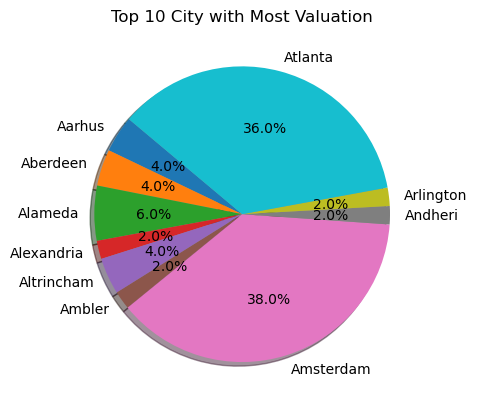

In [35]:
# visualize the top 10 City by Valuation
explode = (0.1, 0, 0)
plt.pie(top10_loc, labels = top10_loc.index,  autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Top 10 City with Most Valuation')
plt.show()

In [66]:
### Unicorn Startups in different Industry Sector

fig = px.pie(Unicorn_data, names ='Industry')
fig.update_layout(title="Unicorn Startups in different Industry Sectors",height=400,width=800)
fig.show()


observation

it is observed that Internet software & services has the highest number of Unicorn Startups in the Industry with a value of 24.1%, while Artificial intelligence has 1.29% compared to others.

In [67]:
# statistical descriptive analysis of the numerical features
Unicorn_data.describe()

,Valuation ($B),Year Founded,Funding ($B)
count,1074.000000,1074.000000,1074.000000
mean,3.455307,2012.895717,334.313780
std,8.547022,5.698573,238.665354
min,1.000000,1919.000000,0.000000
25%,1.000000,2011.000000,161.000000
50%,2.000000,2014.000000,299.000000
75%,3.000000,2016.000000,488.500000
max,180.000000,2021.000000,999.000000


In [69]:
# which Continent received the highest Valuation
ctn_vol = Unicorn_data['Valuation ($B)'].groupby(Unicorn_data.Continent).sum().sort_values()
ctn_vol

Continent
Africa              5.0
South America      48.0
Oceania            56.0
Europe            503.0
Asia             1067.0
North America    2032.0
Name: Valuation ($B), dtype: float64

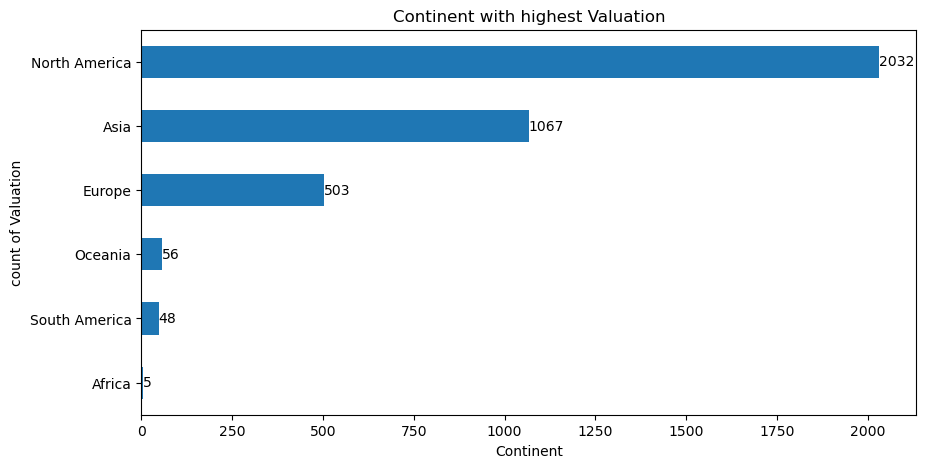

In [70]:
# visualize using bar chart
ax = ctn_vol.plot(kind = 'barh', figsize = (10, 5), title = 'Continent with highest Valuation', ylabel = 'count of Valuation', 
                       xlabel = 'Continent', legend = False)
#annonate
ax.bar_label(ax.containers[0], label_type = 'edge')

# pad the spacing between the number and edge of the figure
ax.margins(y = 0.1)

# show the visual
plt.show()


## observation
it is observed that North American has the highest value of Valuation with a value of $2032B while Africa has $5B comapared to other Continent

In [71]:
# which industry received the highest Valuation 
max_Ind = Unicorn_data['Valuation ($B)'].groupby(Unicorn_data['Industry']).max().sort_values()
max_Ind

Industry
Artificial Intelligence                  3.0
Cybersecurity                            9.0
Mobile & telecommunications              9.0
Travel                                  10.0
Auto & transportation                   11.0
Hardware                                12.0
Health                                  13.0
Edtech                                  22.0
Consumer & retail                       38.0
Data management & analytics             38.0
Supply chain, logistics, & delivery     39.0
Internet software & services            40.0
Fintech                                 95.0
E-commerce & direct-to-consumer        100.0
Other                                  100.0
Artificial intelligence                180.0
Name: Valuation ($B), dtype: float64

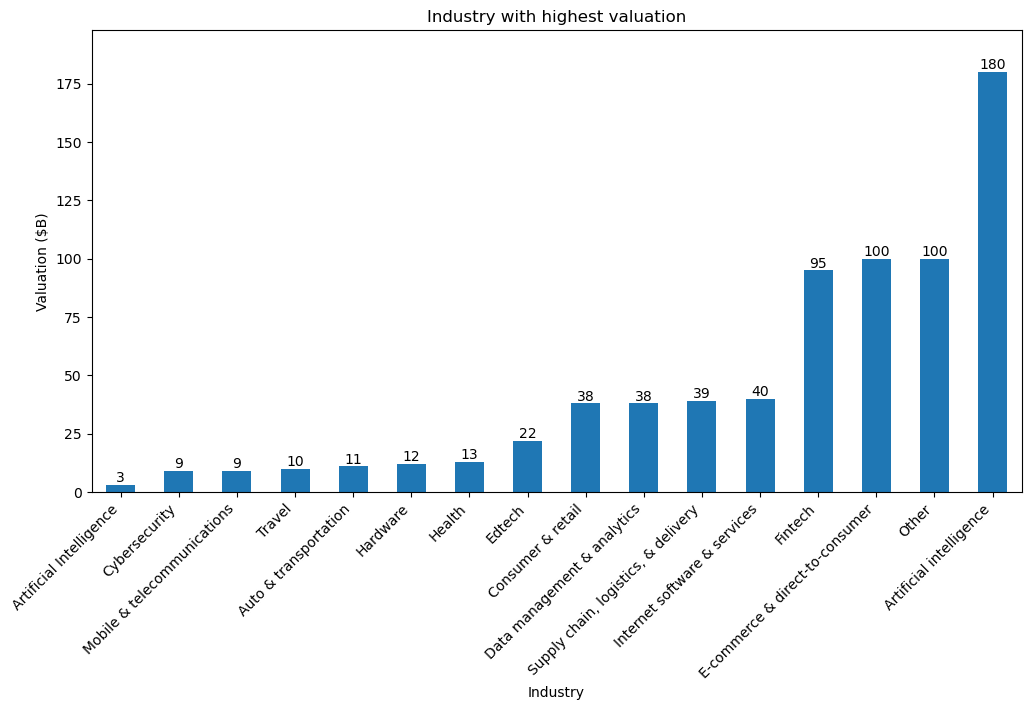

In [72]:
# visualize using bar chart
ax = max_Ind.plot(kind = 'bar', figsize = (12, 6), title = 'Industry with highest valuation', ylabel = 'Valuation ($B)', 
                       xlabel = 'Industry', legend = False)

# set x-axis tick labels and rotation
ax.set_xticklabels(max_Ind.index, rotation=45, ha='right')

# annonate
ax.bar_label(ax.containers[0], label_type = 'edge')

# pad the spacing between the number and edge of the figure
ax.margins(y = 0.1)

# show the visual
plt.show()

### Observation

-Artificial intelligence is the highest valued with a  valuation of $180B followed

by other and E-commerce & direct-to-consumer with a value of $100B  and  $100B respectively compared to others.


In [73]:
# Top 3 City by Valuation
top3_cit = Unicorn_data['Valuation ($B)'].groupby(Unicorn_data['City']).sum().head(3)
top3_cit

City
Aarhus      2.0
Aberdeen    2.0
Alameda     3.0
Name: Valuation ($B), dtype: float64

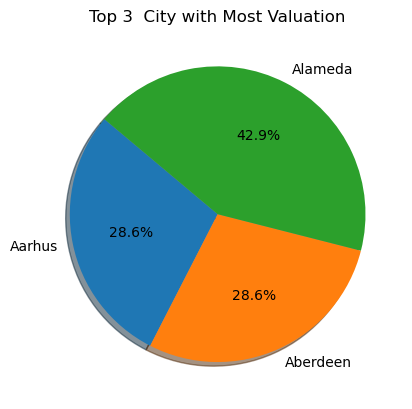

In [74]:
# visualize top 3 City by Valuation
explode = (0.1, 0, 0)
plt.pie(top3_cit, labels = top3_cit.index,  autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Top 3  City with Most Valuation')
plt.show()

observation


it is observed that Alameda has the highest value of Valuation in terms of percentage wise of 42.9%, whiles  Aarhus and Aberdeen have 28.6% respectively.

In [75]:
## top 3 cities with the highest total valuation
top3_cit = Unicorn_data.groupby('City').sum().sort_values(by='Valuation ($B)', ascending=False).head(3)['Valuation ($B)']
top3_cit


C:\Users\BAB AL SAFA\AppData\Local\Temp\ipykernel_16680\2859981858.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



City
San Francisco    724.0
Beijing          348.0
New York         233.0
Name: Valuation ($B), dtype: float64

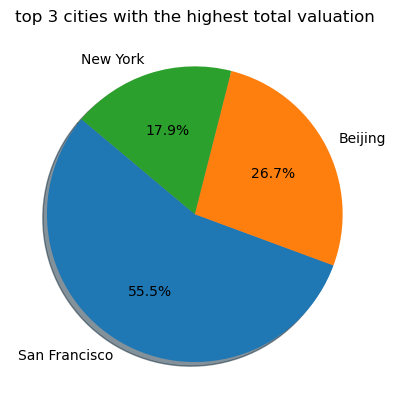

In [76]:
# visualize top 3 City by Valuation
explode = (0.1, 0, 0)
plt.pie(top3_cit, labels = top3_cit.index,  autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('top 3 cities with the highest total valuation')
plt.show()

In [77]:
# Bottom 3 City by valuation
bot3_cit = Unicorn_data['Valuation ($B)'].groupby(Unicorn_data['City']).sum().tail(3).sort_values(ascending = False)
bot3_cit

City
Zhuhai         5.0
Zephyr Cove    2.0
Zurich         2.0
Name: Valuation ($B), dtype: float64

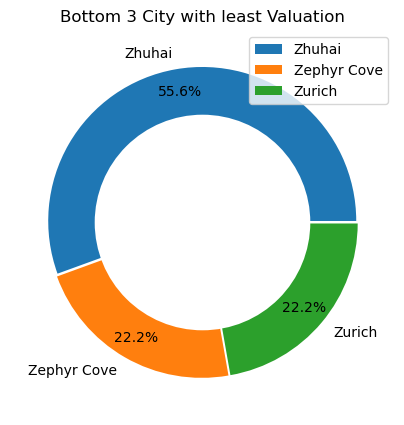

In [78]:
# using donut chart to visualize the bottom location
explode = (0.01, 0.01, 0.01)

# create a new figure with a size of (6, 6)

plt.figure(figsize=(5, 5))

# draw the pie chart
plt.pie(bot3_cit, labels = bot3_cit.index,  autopct = '%1.1f%%', pctdistance = 0.85, explode = explode)

# draw a circle
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()

# Adding the circle
fig.gca().add_artist(centre_circle)

# add legends
plt.legend(bot3_cit.index, loc = 'upper right')

plt.title('Bottom 3 City with least Valuation')
plt.show()

observation

it is observed that Zhuhai  has the lowest value of Valuation in terms of percentage wise of 55.6%, whiles Zephyr Cove and Zurich have 22.2% respectively.

In [79]:
# Summary statistics per Industry and Valuation
Unicorn_data.groupby('Industry')['Valuation ($B)'].describe().astype('int')

,count,mean,std,min,25%,50%,75%,max
Industry,,,,,,,,
Artificial Intelligence,11,1,0,1,1,1,2,3
Artificial intelligence,73,4,20,1,1,2,3,180
Auto & transportation,31,3,2,1,1,2,4,11
Consumer & retail,25,4,7,1,1,2,2,38
Cybersecurity,50,2,2,1,1,2,3,9
Data management & analytics,41,3,5,1,1,2,3,38
E-commerce & direct-to-consumer,111,3,9,1,1,2,3,100
Edtech,28,3,4,1,1,2,3,22
Fintech,224,3,8,1,1,2,3,95


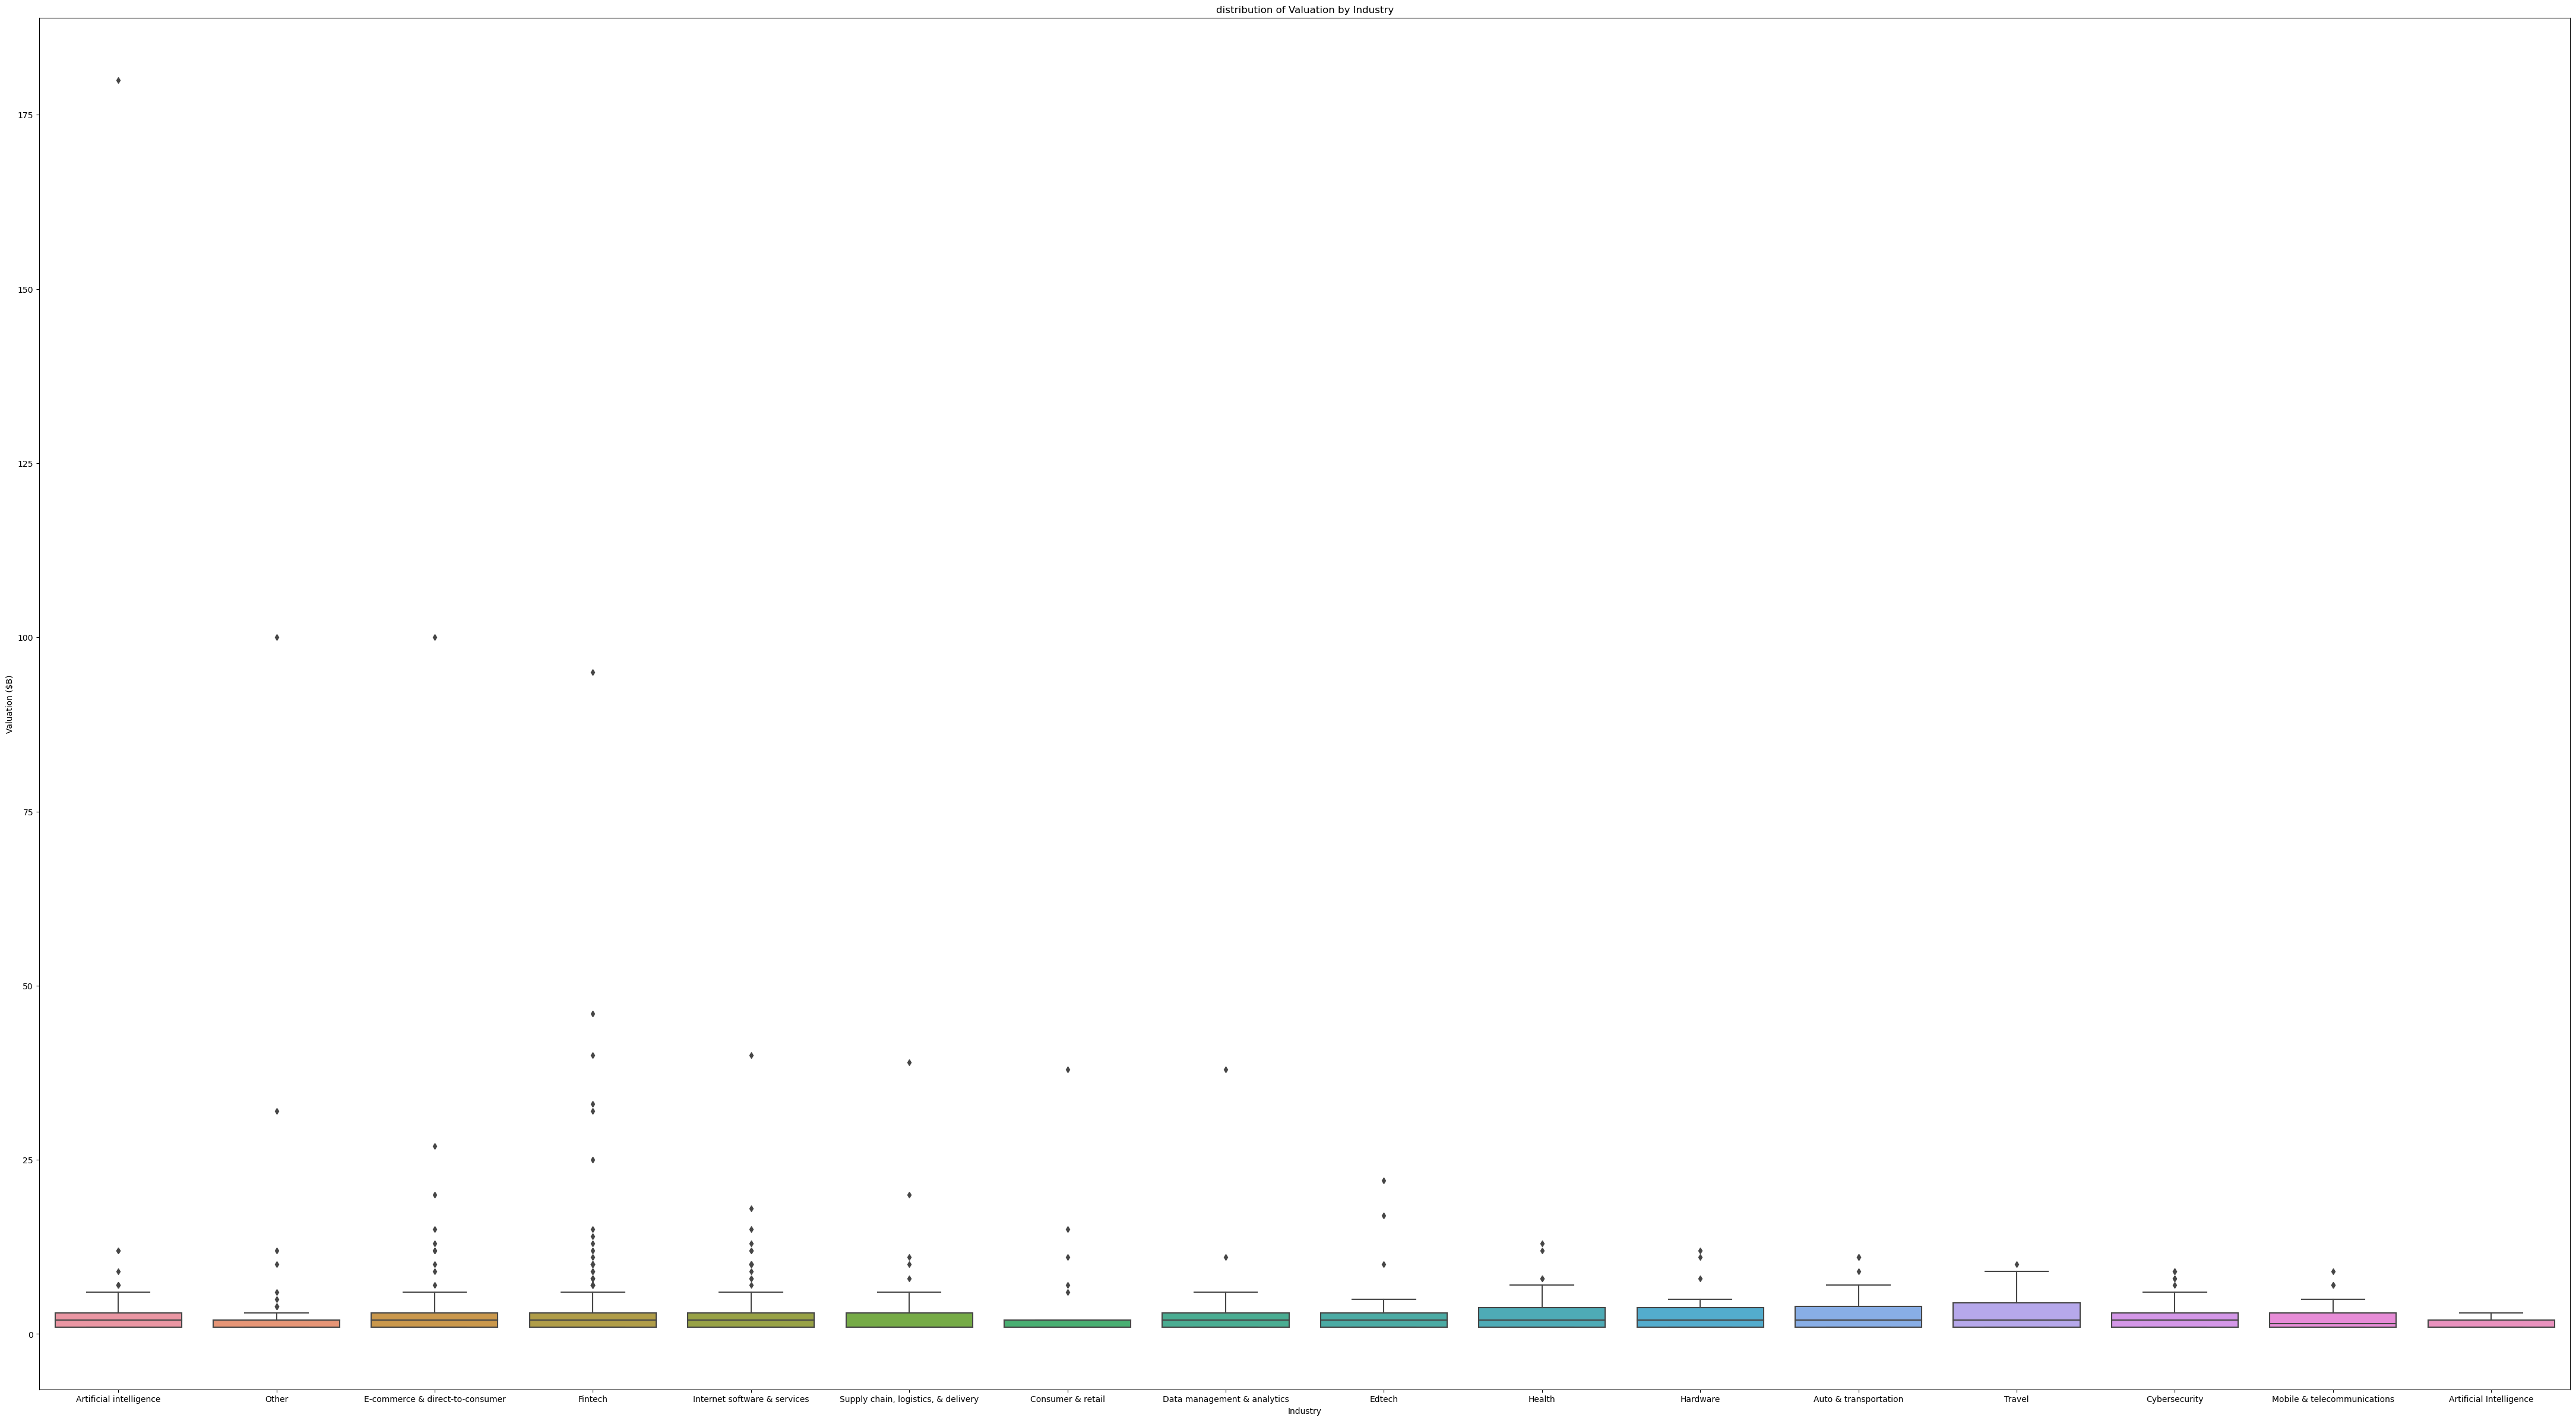

In [80]:
# view distribution of Valuation by Industry
plt.figure(figsize=(55, 30))
sns.boxplot(x = Unicorn_data['Industry'], y = Unicorn_data['Valuation ($B)'], data = Unicorn_data)
plt.title('distribution of Valuation by Industry')
plt.show()

### observation 

-we can see that the most valued industry  are  in E-commerce & direct-to-consumer and other  with 

the median valuation of  $100B, while the least industry  are in Fintech  with the median valuation

of $95B compared to other industry.

In [81]:
# To know the Industry with the minimum value of  valuation
Val_lnd = Unicorn_data.groupby(['Industry', 'Continent'])['Valuation ($B)'].min().astype('int').unstack('Continent')
Val_lnd

Continent,Africa,Asia,Europe,North America,Oceania,South America
Industry,,,,,,
Artificial Intelligence,NaN,1.0,NaN,1.0,NaN,2.0
Artificial intelligence,NaN,1.0,1.0,1.0,NaN,1.0
Auto & transportation,NaN,1.0,1.0,1.0,NaN,NaN
Consumer & retail,NaN,1.0,1.0,1.0,NaN,NaN
Cybersecurity,NaN,1.0,3.0,1.0,NaN,NaN
Data management & analytics,NaN,1.0,1.0,1.0,NaN,NaN
E-commerce & direct-to-consumer,NaN,1.0,1.0,1.0,1.0,1.0
Edtech,NaN,1.0,3.0,1.0,NaN,NaN
Fintech,2.0,1.0,1.0,1.0,3.0,1.0


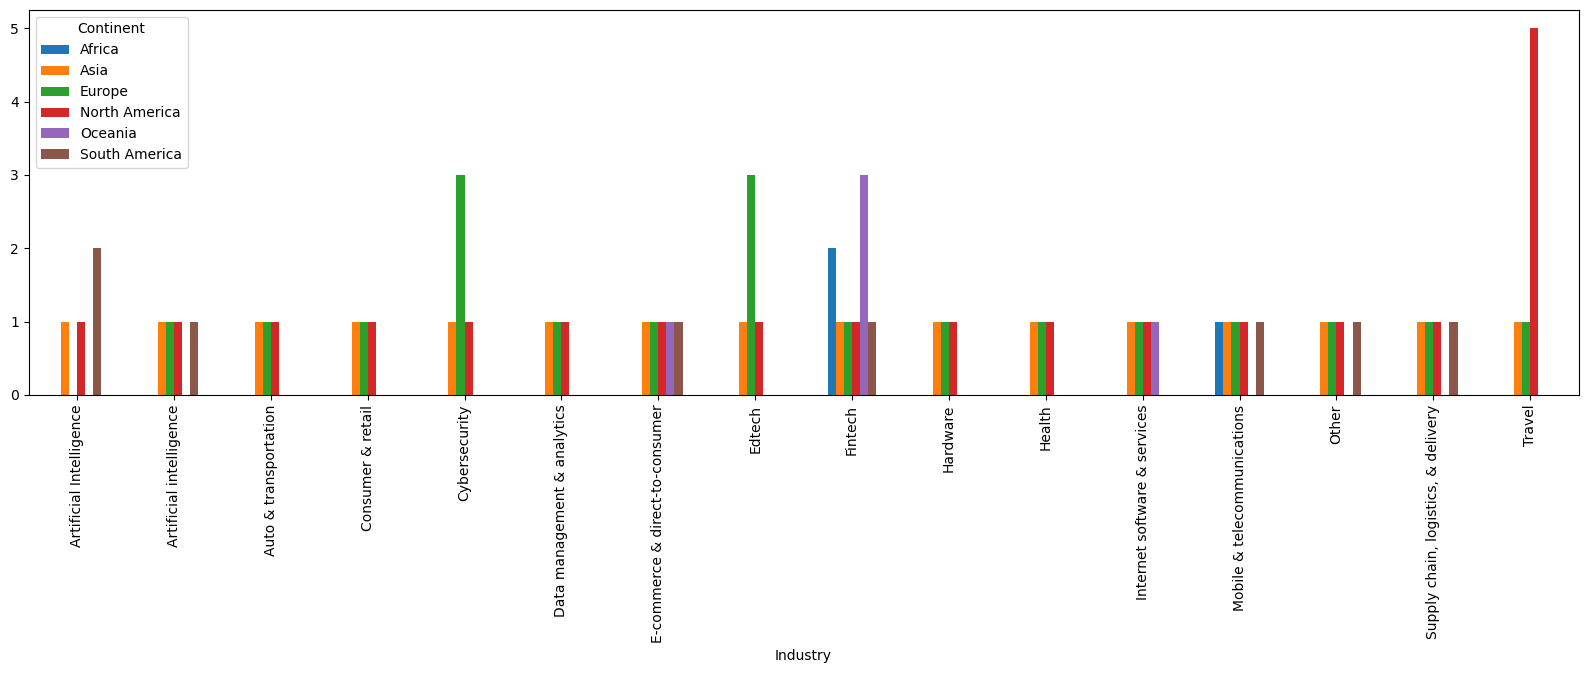

In [82]:
# plot a pivot table
Val_lnd.plot.bar(figsize = (20, 5))
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

Observation
-Almost all the Industry have minimum value of valuation with the exception of Travel, Fintech,Edtech and Cybersecurity.

## Top 20 most valued startup based country

In [88]:
## Visualization of Most valued startup unicorns
top20_Val = Unicorn_data.groupby('Company').sum().sort_values('Valuation ($B)', ascending=False).head(20)
top20_Val = top20_Val.reset_index()
px.bar(x='Company', y ="Valuation ($B)", data_frame=top20_Val)
#set x-axis tick labels and rotation
fig.update_layout(xaxis={'tickangle':45})



C:\Users\BAB AL SAFA\AppData\Local\Temp\ipykernel_16680\2332049295.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## Observation
It is observed that United States has a total valuation of more than $1800B of unicorn 

startups,whiles  China has a total valuation of more than $700B of unicorn startups compared to 

others countries.

## Recommendation


 -Bytedance, SpaceX, SHEIN and Stripe stands out as the companies, among unicorns delivering impressive returns on investment.
    
 -Typically it takes seven years for a company to achieve a valuation of $1 billion and earn the unicorn status.

 -The United States has a number of unicorns with 562 in total and San Francisco takes the lead with 152 unicorn companies headquartered there.
    
 -Accel and Tiger Global Management are recognized as investors in the field of unicorns contributing significantly to their success.

 -Unicorns in the United States and China have outperformed other regions experiencing a remarkable 72% increase, in overall valuations.
    

 -Unicorns operating in the fields of AI, e commerce, fintech and edtech exhibit higher valuations compared to the average unicorn with an average valuation of $3.5 billion.
 

 -Africa has the lowest total valuation of $5B among all continents, while North America has the highest valuation of $2,032B, surpassing South America and other continents. Investors could benefit from focusing their attention on Africa to capitalize on its potential. Research indicates that the African continent is the largest supplier of natural resources to the world. Therefore, it would be rational to set up startups in this area to take advantage of these opportunities.